In [ ]:
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Dosyanın tam yolu (dosya Drive'da ise yolu güncelleyin)
# Bu yolu Google Colab dosya gezgininden kopyalayarak doğrulayın
# Örnek yol: /content/drive/My Drive/WA_Fn-UseC_-Telco-Customer-Churn.csv
file_path = "/content/drive/My Drive/WA_Fn-UseC_-Telco-Customer-Churn.csv" # Dosya yolunu Google Drive'daki dosyanın konumuyla değiştirin

# CSV dosyasını oku
df = pd.read_csv(file_path)

In [ ]:
df.head()  # Varsayılan olarak ilk 5 satırı gösterir

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape  # (satır sayısı, sütun sayısı)

(7043, 21)

In [ ]:
df.describe() # Temel istatistiksel özet

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Eksik değerleri tespit et
missing_values = df.isnull().sum()

# Eksik veri içeren sütunları filtreleyerek sadece eksik değerleri gösterelim
missing_values = missing_values[missing_values > 0]

# Sonucu daha düzenli görüntüleyelim
print("Eksik Değer Sayıları:\n")
print(missing_values)

Eksik Değer Sayıları:

Series([], dtype: int64)


In [ ]:
# Eksik veri yüzdesini hesapla
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sadece eksik verisi olan sütunları gösterelim
missing_percentage = missing_percentage[missing_percentage > 0]

# Sonucu daha okunaklı hale getirelim
print("Eksik Değer Yüzdeleri (%):\n")
print(missing_percentage.round(2))

Eksik Değer Yüzdeleri (%):

Series([], dtype: float64)


In [ ]:
df.sample(n=5) # veri setinden 5 rastgele satır seçm

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6211,4439-JMPMT,Female,0,Yes,Yes,5,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,85.75,470.95,Yes
6035,9835-ZIITK,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,110.85,7491.75,Yes
6485,5921-NGYRH,Male,0,Yes,No,64,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,73.55,4764,No
3430,9391-LMANN,Male,0,No,Yes,53,Yes,No,Fiber optic,Yes,...,Yes,No,No,Yes,One year,No,Electronic check,95.95,5036.9,No
5345,9526-JAWYF,Male,0,No,No,26,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Electronic check,89.80,2335.3,Yes


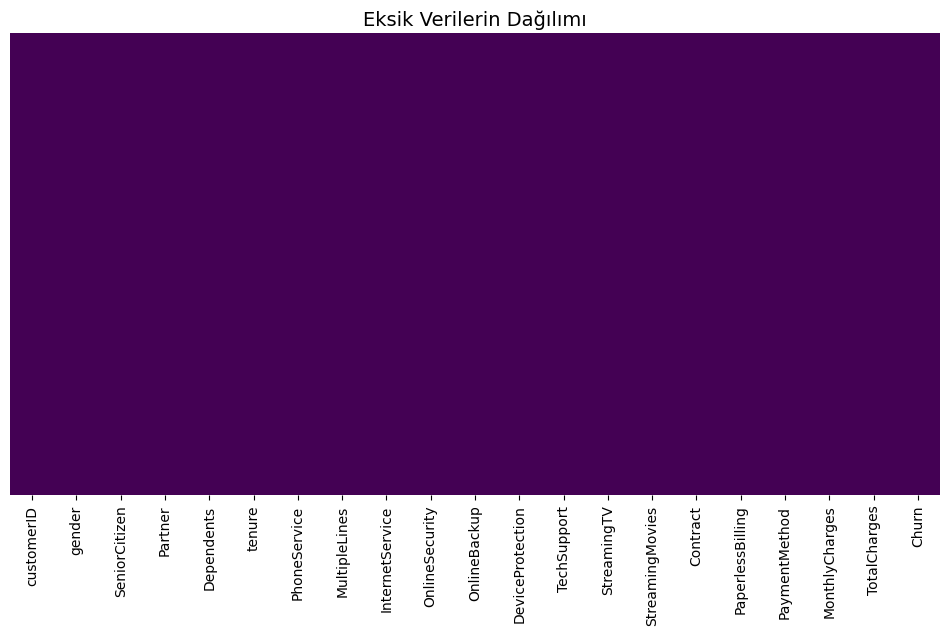

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Eksik Verilerin Dağılımı", fontsize=14)
plt.show()

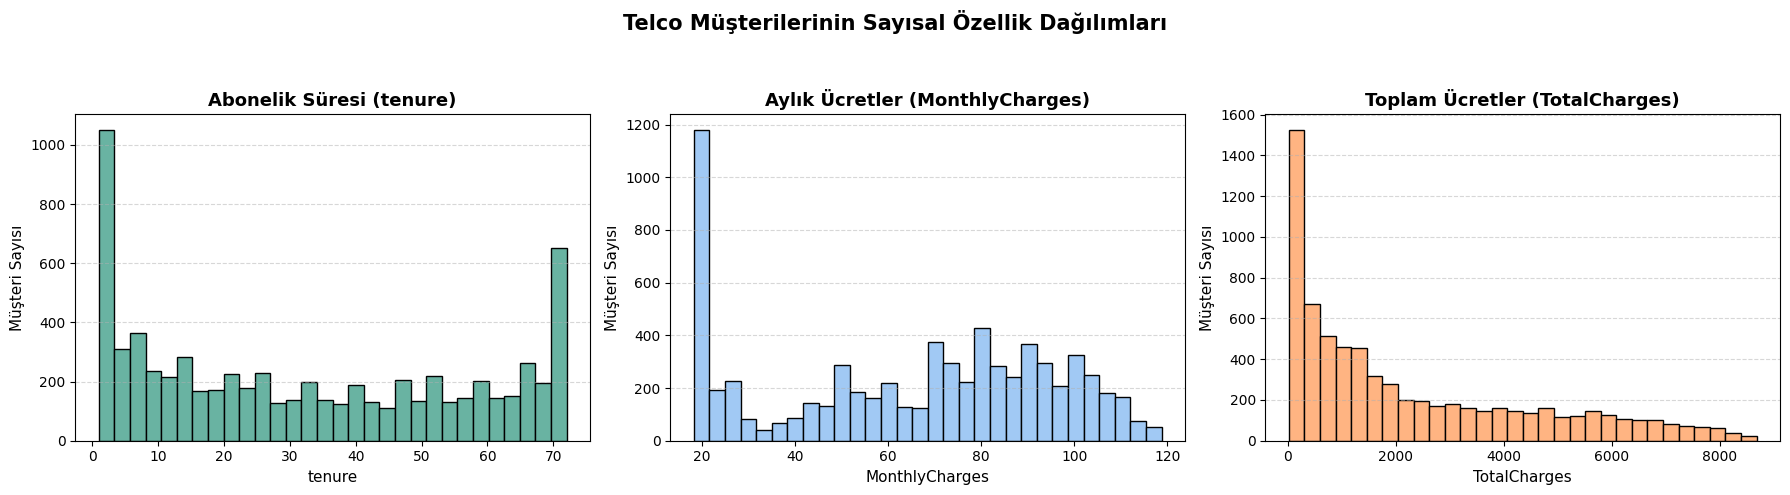

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 'TotalCharges' sütununu sayısala çevirip boşları at
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_cleaned = df.dropna(subset=['TotalCharges'])

# Sayısal sütunlar
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Grafik çizimi
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['#69b3a2', '#a1c9f4', '#ffb482']
titles = ['Abonelik Süresi (tenure)', 'Aylık Ücretler (MonthlyCharges)', 'Toplam Ücretler (TotalCharges)']

for i, col in enumerate(numeric_cols):
    axes[i].hist(df_cleaned[col], bins=30, edgecolor="black", color=colors[i])
    axes[i].set_title(titles[i], fontsize=13, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel("Müşteri Sayısı", fontsize=11)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle("Telco Müşterilerinin Sayısal Özellik Dağılımları", fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


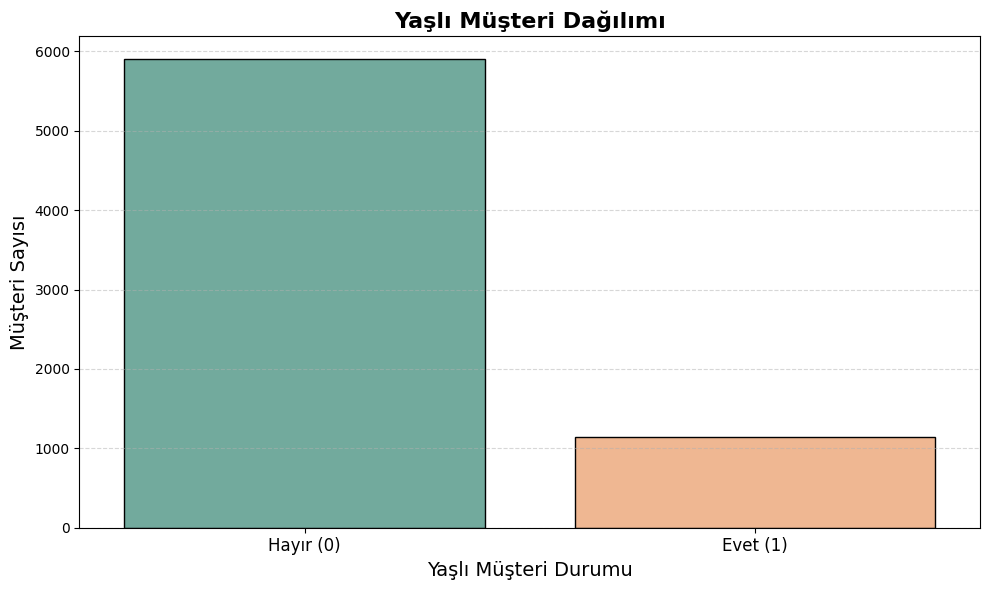

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik boyutunu daha büyük yapalım
plt.figure(figsize=(10, 6))

# SeniorCitizen (Yaşlı Vatandaş) değişkeni için sayım grafiği
sns.countplot(data=df, x="SeniorCitizen", hue="SeniorCitizen", edgecolor="black",
              palette=["#69b3a2", "#ffb482"], legend=False)

# Başlık ve etiketler
plt.title("Yaşlı Müşteri Dağılımı", fontsize=16, fontweight='bold')
plt.xlabel("Yaşlı Müşteri Durumu", fontsize=14)
plt.ylabel("Müşteri Sayısı", fontsize=14)

# X ekseninde etiketleri daha anlamlı hale getirelim
plt.xticks([0, 1], ["Hayır (0)", "Evet (1)"], fontsize=12)

# Y ekseninde daha net bir görünüm sağlamak için grid ekleyelim
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Grafik düzenlemesi için tight_layout kullanarak elemanlar arasında boşluk bırakma
plt.tight_layout()

# Grafiği gösterme
plt.show()


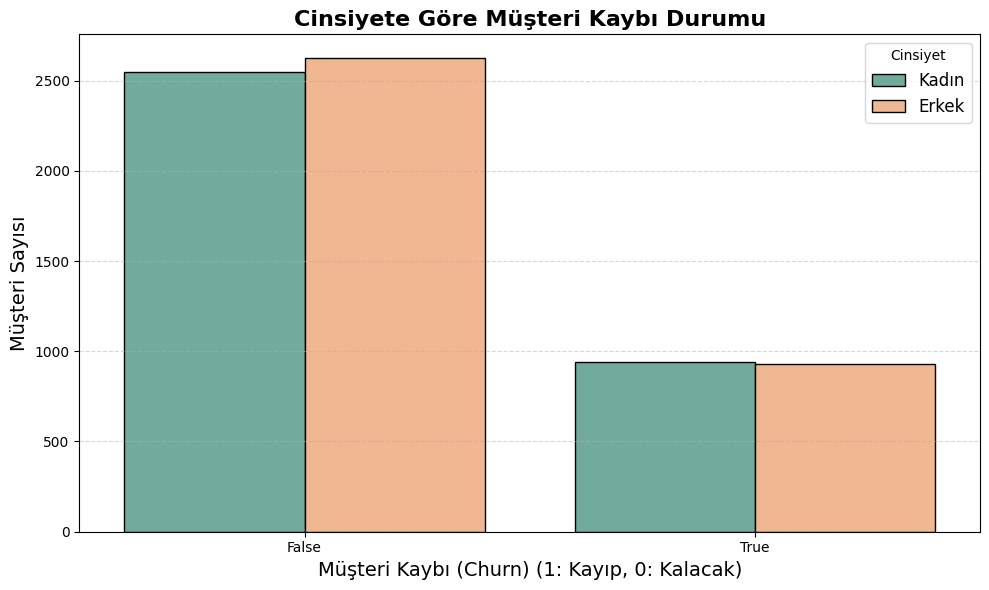

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 'Churn' sütununu one-hot encoding ile dönüştür
df = pd.get_dummies(df, columns=['Churn'], prefix=['Churn'], drop_first=False)

# Şimdi 'Churn_Yes' sütununu kullanabilirsiniz
sns.countplot(data=df, x="Churn_Yes", hue="gender", palette=["#69b3a2", "#ffb482"], edgecolor="black")

plt.title("Cinsiyete Göre Müşteri Kaybı Durumu", fontsize=16, fontweight='bold')
plt.xlabel("Müşteri Kaybı (Churn) (1: Kayıp, 0: Kalacak)", fontsize=14)
plt.ylabel("Müşteri Sayısı", fontsize=14)
plt.legend(title="Cinsiyet", labels=["Kadın", "Erkek"], fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

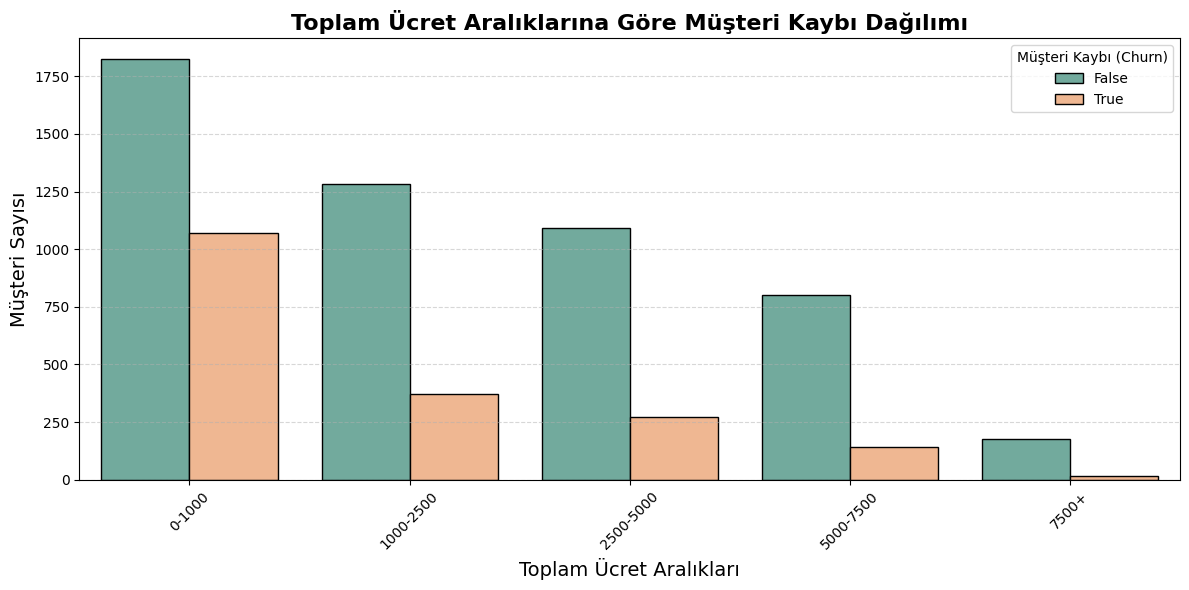

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sütun adlarını temizle
df.columns = df.columns.str.strip()

# TotalCharges'ı sayısal değere çevir (bozuk olanları NaN yap)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Boş değerleri temizle
df_cleaned = df.fillna(df['TotalCharges'].median()).copy()

# TotalCharges için mantıklı aralıklar belirleme (özel değerler kullanılabilir)
charge_bins = [0, 1000, 2500, 5000, 7500, float('inf')]  # Aralıklar ihtiyaca göre düzenlenebilir
bin_labels = ['0-1000', '1000-2500', '2500-5000', '5000-7500', '7500+']

# TotalCharges sütununu belirlediğimiz aralıklara göre kategorilere ayırma
df_cleaned['ChargeBins'] = pd.cut(df_cleaned['TotalCharges'], bins=charge_bins, labels=bin_labels, include_lowest=True)

# Grafik çizimi
plt.figure(figsize=(12, 6))

sns.countplot(
    data=df_cleaned,
    x='ChargeBins',
    hue=df_cleaned['Churn_Yes'],  # 'Churn' yerine 'Churn_Yes' kullanıldı
    palette=['#69b3a2', '#ffb482'],
    edgecolor='black'
)

# Başlık ve etiketler
plt.title("Toplam Ücret Aralıklarına Göre Müşteri Kaybı Dağılımı", fontsize=16, fontweight='bold')
plt.xlabel("Toplam Ücret Aralıkları", fontsize=14)
plt.ylabel("Müşteri Sayısı", fontsize=14)
plt.xticks(rotation=45)  # X ekseni etiketlerini döndürme
plt.legend(title='Müşteri Kaybı (Churn)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Göster
plt.show()

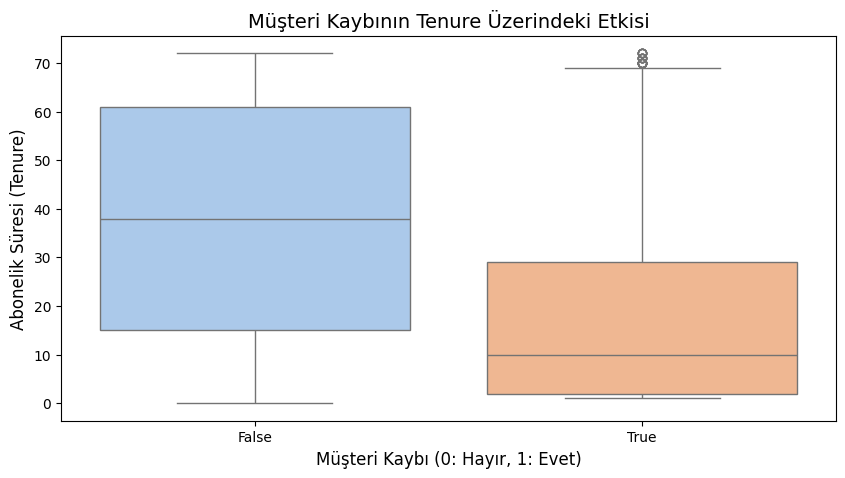

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Uyarıyı önlemek için hue parametresi eklendi
sns.boxplot(x="Churn_Yes", y="tenure", hue="Churn_Yes", data=df, palette="pastel", legend=False)

plt.title("Müşteri Kaybının Tenure Üzerindeki Etkisi", fontsize=14)
plt.xlabel("Müşteri Kaybı (0: Hayır, 1: Evet)", fontsize=12)
plt.ylabel("Abonelik Süresi (Tenure)", fontsize=12)

plt.show()


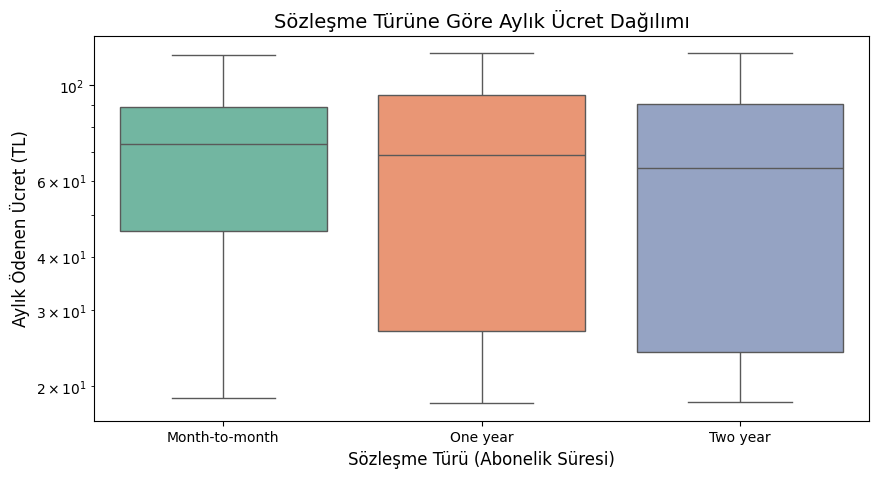

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the file is in your Google Drive and you've mounted it
file_path = "/content/drive/My Drive/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Orjinal veri setini tekrar yükle
df = pd.read_csv(file_path)  # Dosya yolunu doğru şekilde güncelleyin

plt.figure(figsize=(10, 5))

# 'Contract' sütununu x ekseni için kullanın
sns.boxplot(x='Contract', y='MonthlyCharges', data=df,
            hue='Contract', palette='Set2', legend=False)  # hue da 'Contract' olarak değiştirildi

plt.title("Sözleşme Türüne Göre Aylık Ücret Dağılımı", fontsize=14)

# X ekseni açıklaması
plt.xlabel("Sözleşme Türü (Abonelik Süresi)", fontsize=12)
# Örneğin, 'Aylık', 'Bir Yıllık', 'İki Yıllık' gibi abonelik türleri olabilir

# Y ekseni açıklaması
plt.ylabel("Aylık Ödenen Ücret (TL)", fontsize=12)
# Müşterinin her ay ödediği ücret, Türk Lirası cinsinden

plt.yscale("log")  # Uç değerler varsa logaritmik ölçek

plt.show()

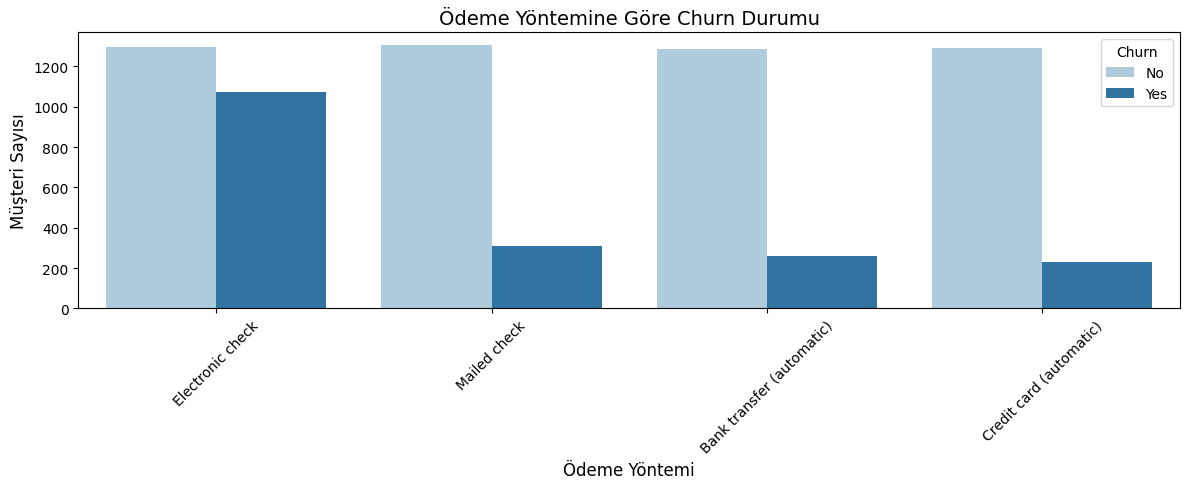

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x=df["PaymentMethod"], hue=df["Churn"], palette="Paired")

plt.title("Ödeme Yöntemine Göre Churn Durumu", fontsize=14)
plt.xlabel("Ödeme Yöntemi", fontsize=12)
plt.ylabel("Müşteri Sayısı", fontsize=12)
plt.legend(title="Churn")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
missing_values_before = df.isnull().sum()
print("Eksik Değer Analizi (Önce):")
print(missing_values_before)


Eksik Değer Analizi (Önce):
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
# TotalCharges sütununu sayıya çevir ve eksik değerleri medyanla doldur
df.loc[:, 'TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
median_value = df['TotalCharges'].median()
df.loc[:, 'TotalCharges'] = df['TotalCharges'].fillna(median_value)

# Eksik değerlerin sayısını tekrar kontrol et
print("\nEksik Değer Sayıları (sonrası):")
print(df.isnull().sum())



Eksik Değer Sayıları (sonrası):
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Google Colab için dosya yükleme
from google.colab import files
import pandas as pd

# Dosyayı yükle (bir dosya seçmen için pencere açılır)
uploaded = files.upload()

# Yüklenen dosyanın ismini al (ilk yüklenen dosyayı)
file_name = list(uploaded.keys())[0]

# Dosyayı pandas ile oku
df = pd.read_csv(file_name)

# Aykırı değer temizleme fonksiyonu (önceki gibi)
def remove_outliers_iqr(df, column):
    if column not in df.columns:
        print(f"Warning: '{column}' sütunu bulunamadı.")
        return df

    df[column] = pd.to_numeric(df[column], errors='coerce')

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)

    return df

# Aykırı değer temizleme
df = remove_outliers_iqr(df, 'tenure')
df = remove_outliers_iqr(df, 'TotalCharges')

# Sonucu kontrol et
print(df.head())


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...

In [ ]:
# 1. gender Sütununu Sayısallaştırma
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# 2. One-Hot Encoding - İhtiyacınıza Göre Başka Sütunlar Seçin
# Örnek olarak, 'InternetService' sütununu ele alalım:
df = pd.get_dummies(df, columns=['InternetService'], prefix='InternetService')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,False,False
1,5575-GNVDE,0,0,No,No,34,Yes,No,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,True,False,False
2,3668-QPYBK,0,0,No,No,2,Yes,No,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True,False,False
3,7795-CFOCW,0,0,No,No,45,No,No phone service,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True,False,False
4,9237-HQITU,1,0,No,No,2,Yes,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,False,True,False


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,False,False
1,5575-GNVDE,0,0,No,No,34,Yes,No,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,True,False,False
2,3668-QPYBK,0,0,No,No,2,Yes,No,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True,False,False
3,7795-CFOCW,0,0,No,No,45,No,No phone service,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True,False,False
4,9237-HQITU,1,0,No,No,2,Yes,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,False,True,False


In [ ]:
# Aykırı değerleri belirleme ve temizleme fonksiyonu (IQR yöntemi ile)
def remove_outliers_iqr(df, column):
    # Check if column exists before using it
    if column not in df.columns:
        print(f"Warning: Column '{column}' not found in the DataFrame. Skipping outlier removal for this column.")
        return df

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aşırı uç değerleri üst sınır ile değiştirme
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df


# Replace 'Age' and 'Fare' with the actual column names from your dataset.
# Here, I am showing as 'tenure' and 'TotalCharges' as those are more relevant to a telco customer dataset.
# You might need to change this if your columns have different names.
df = remove_outliers_iqr(df, 'tenure')
df = remove_outliers_iqr(df, 'TotalCharges')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Yes,No,1.0,No,No phone service,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,False,False
1,5575-GNVDE,0,0,No,No,34.0,Yes,No,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,True,False,False
2,3668-QPYBK,0,0,No,No,2.0,Yes,No,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True,False,False
3,7795-CFOCW,0,0,No,No,45.0,No,No phone service,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True,False,False
4,9237-HQITU,1,0,No,No,2.0,Yes,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,False,True,False


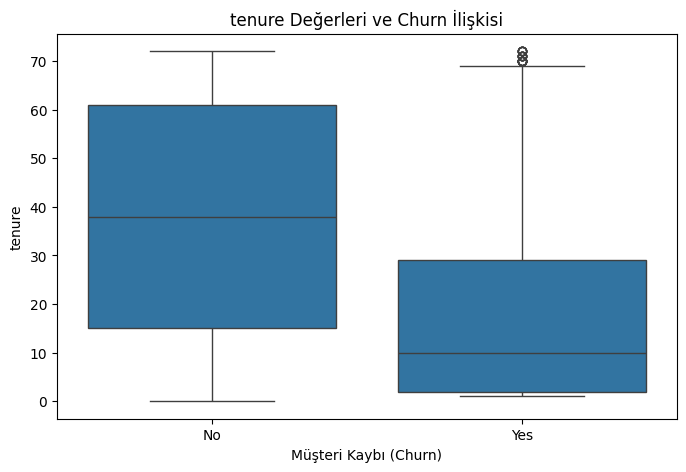

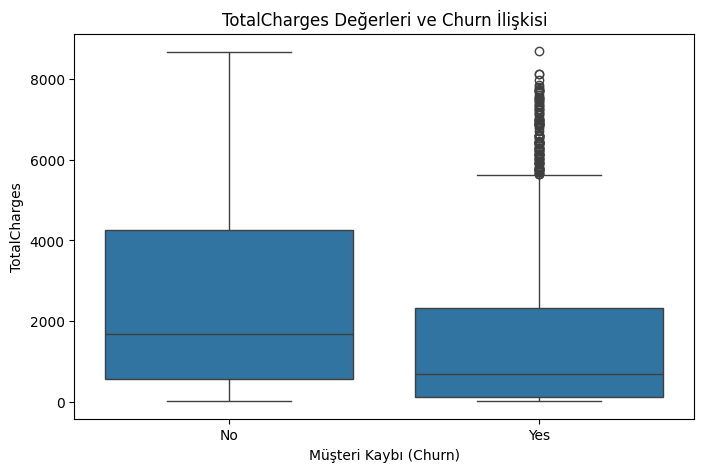

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini okuma (dosyanın yolunu kendi ortamına göre değiştir)
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 'TotalCharges' sütununu sayısala çevir ve eksikleri medyan ile doldur (inplace kullanmadan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Boxplot fonksiyonu
def plot_boxplot_by_churn(df, column, target_col='Churn'):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=target_col, y=column, data=df)
    plt.title(f"{column} Değerleri ve {target_col} İlişkisi")
    plt.xlabel("Müşteri Kaybı (Churn)")
    plt.ylabel(column)
    plt.show()

# 'tenure' ve 'TotalCharges' için grafik çizimi
plot_boxplot_by_churn(df, 'tenure')
plot_boxplot_by_churn(df, 'TotalCharges')


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Gerekli kütüphanelerin import edilmesi

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Veriyi oku
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 'Churn' sütununu sayısal formata dönüştür (No: 0, Yes: 1)
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# Eksik varsa en sık değerle doldur (genelde eksik olmaz ama güvenlik için)
if df["Churn"].isnull().sum() > 0:
    df["Churn"] = df["Churn"].fillna(df["Churn"].mode()[0])

# 'TotalCharges' sayısal hale getir ve eksikleri medyan ile doldur
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# Gerekli sütunları ayır
y = df["Churn"]  # Hedef değişken
X = df.drop(columns=["Churn", "customerID"])  # Giriş özellikleri

# Kategorik değişkenleri one-hot encoding ile dönüştür
X = pd.get_dummies(X, drop_first=True)

# Kontrol amaçlı çıktı
print("X shape:", X.shape)
print("y value counts:\n", y.value_counts())


X shape: (7043, 30)
y value counts:
 Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Veriyi oku
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2. Churn sütununu sayısal hale getir
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})
df["Churn"] = df["Churn"].fillna(df["Churn"].mode()[0])  # Uyarısız versiyon

# 3. TotalCharges sayıya çevrilip eksikler dolduruluyor
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())  # Uyarısız versiyon

# 4. Özellik ve hedef değişken ayırma
y = df["Churn"]
X = df.drop(columns=["Churn", "customerID"])
X = pd.get_dummies(X, drop_first=True)

# 5. Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Eğitim ve test seti boyutlarını yazdır
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)


Eğitim seti boyutu: (5634, 30)
Test seti boyutu: (1409, 30)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Ölçekleyici tanımla
scaler = StandardScaler()

# Ölçeklenecek sayısal sütunları listele
numeric_cols = ['tenure', 'TotalCharges', 'MonthlyCharges']

# 'FamilySize' sütunu varsa listeye ekle
if 'FamilySize' in X_train.columns:
    numeric_cols.append('FamilySize')

# Ölçeklendirmeyi sadece mevcut sütunlara uygula (güvenli kontrol)
numeric_cols = [col for col in numeric_cols if col in X_train.columns]

# Eğitim verisini fit+transform, test verisini sadece transform et
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [ ]:
!pip install scikit-learn

Accuracy Skoru: 0.8055358410220014

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Karışıklık Matrisi:
 [[926 109]
 [165 209]]


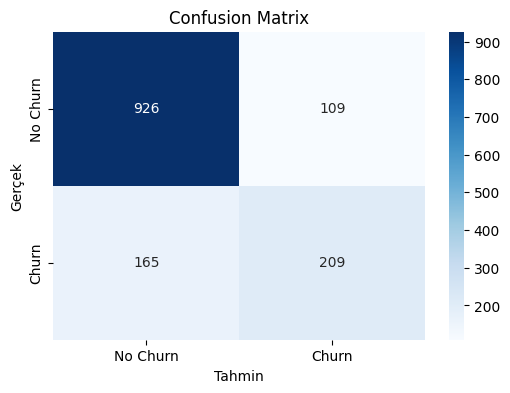

In [ ]:
# 5. Model oluştur ve eğit
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 6. Tahmin yap
y_pred = model.predict(X_test)

# 7. Değerlendirme metrikleri
print("Accuracy Skoru:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("\nKarışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))

# 8. Karışıklık matrisini görselleştir
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()


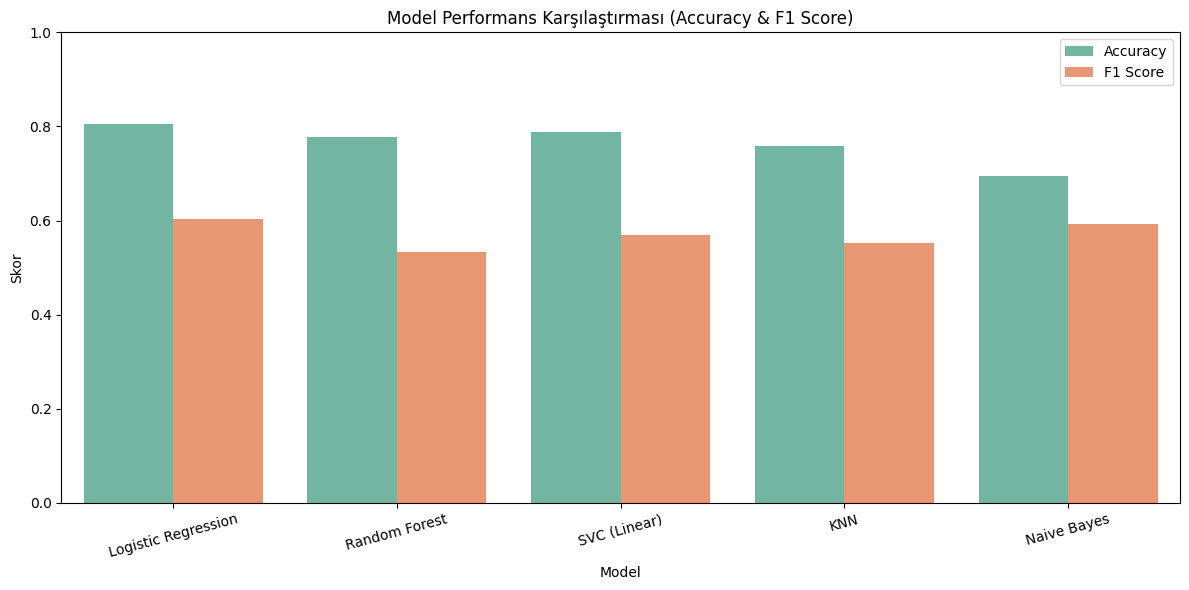

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

# 1. Veriyi oku
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2. 'TotalCharges' sayısala çevir ve eksik doldur
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# 3. Churn'ü sayısal hale getir
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# 4. Bağımlı ve bağımsız değişkenleri ayır
y = df["Churn"]
X = df.drop(columns=["Churn", "customerID"])

# 5. Kategorik sütunları One-Hot Encode et
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([X.drop(columns=categorical_cols).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# 6. Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Sayısal sütunların tipi float olmalı
num_cols = ['tenure', 'TotalCharges', 'MonthlyCharges']
X_train[num_cols] = X_train[num_cols].astype(float)
X_test[num_cols] = X_test[num_cols].astype(float)

# 8. Sayısal sütunları ölçeklendir
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])

# 9. Modelleri tanımla
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVC (Linear)": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# 10. Modelleri eğit ve değerlendir
model_results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_results.append((name, acc, f1))

# 11. Sonuçları DataFrame'e çevir
results_df = pd.DataFrame(model_results, columns=["Model", "Accuracy", "F1 Score"])

# 12. Görselleştir
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable", palette="Set2")
plt.title("Model Performans Karşılaştırması (Accuracy & F1 Score)")
plt.ylabel("Skor")
plt.ylim(0, 1)
plt.legend(title="")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

🎯 XGBoost Model Performansı
Accuracy: 0.754
              precision    recall  f1-score   support

     Churn=0       0.89      0.76      0.82      1035
     Churn=1       0.53      0.74      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.75      0.76      1409



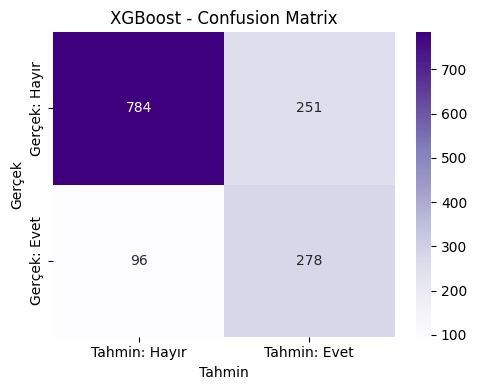

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Pozitif ve negatif örnek sayısını hesapla
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

# Modeli oluştur (use_label_encoder kaldırıldı)
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight
)

# Modeli eğit
xgb_model.fit(X_train, y_train)

# Tahmin yap
y_pred_xgb = xgb_model.predict(X_test)

# Performans metrikleri
print("🎯 XGBoost Model Performansı")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(classification_report(y_test, y_pred_xgb, target_names=["Churn=0", "Churn=1"]))

# Karışıklık matrisini görselleştir
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Tahmin: Hayır", "Tahmin: Evet"],
            yticklabels=["Gerçek: Hayır", "Gerçek: Evet"])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()


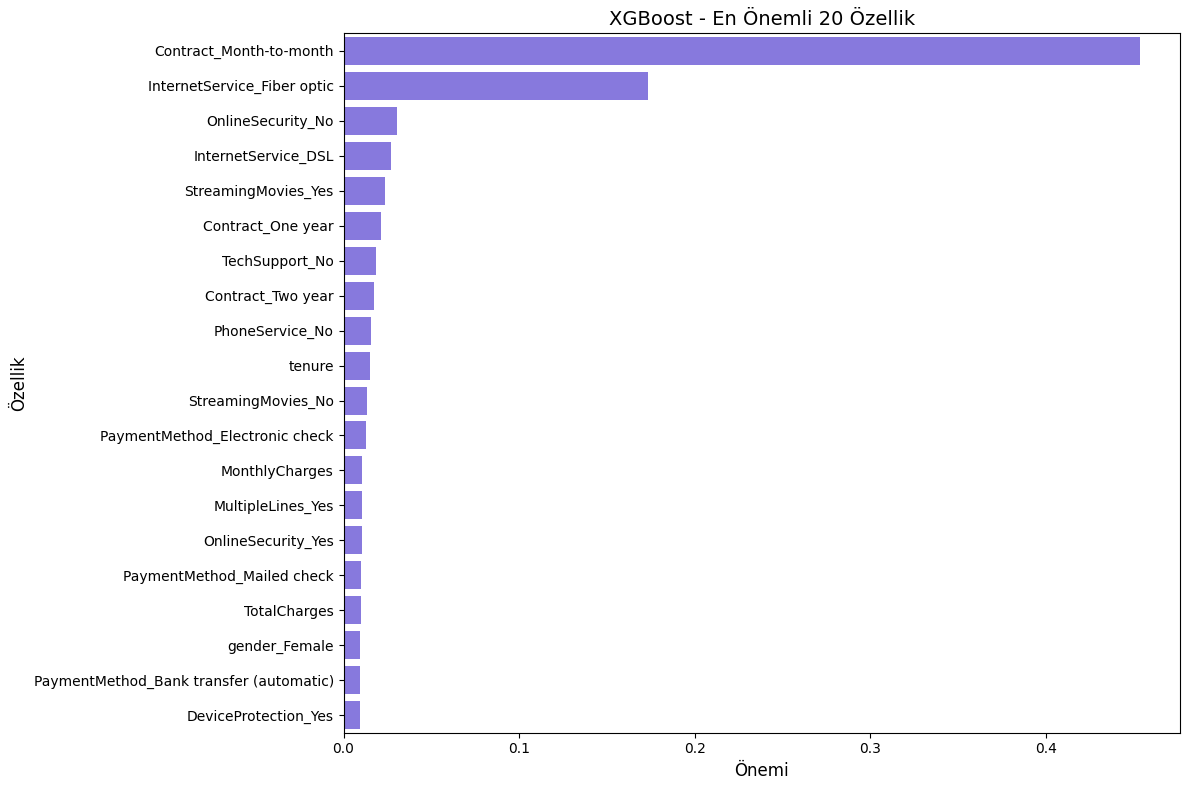

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Modelin önemli değişkenleri
importances = xgb_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Özellik": features,
    "Önemi": importances
}).sort_values(by="Önemi", ascending=False)

# En önemli ilk 20 özelliği al
top_n = 20
top_features = importance_df.head(top_n)

# Grafik çizimi
plt.figure(figsize=(12, 8))
sns.barplot(data=top_features, x="Önemi", y="Özellik", color='mediumslateblue')
plt.title(f"XGBoost - En Önemli {top_n} Özellik", fontsize=14)
plt.xlabel("Önemi", fontsize=12)
plt.ylabel("Özellik", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
!pip install shap

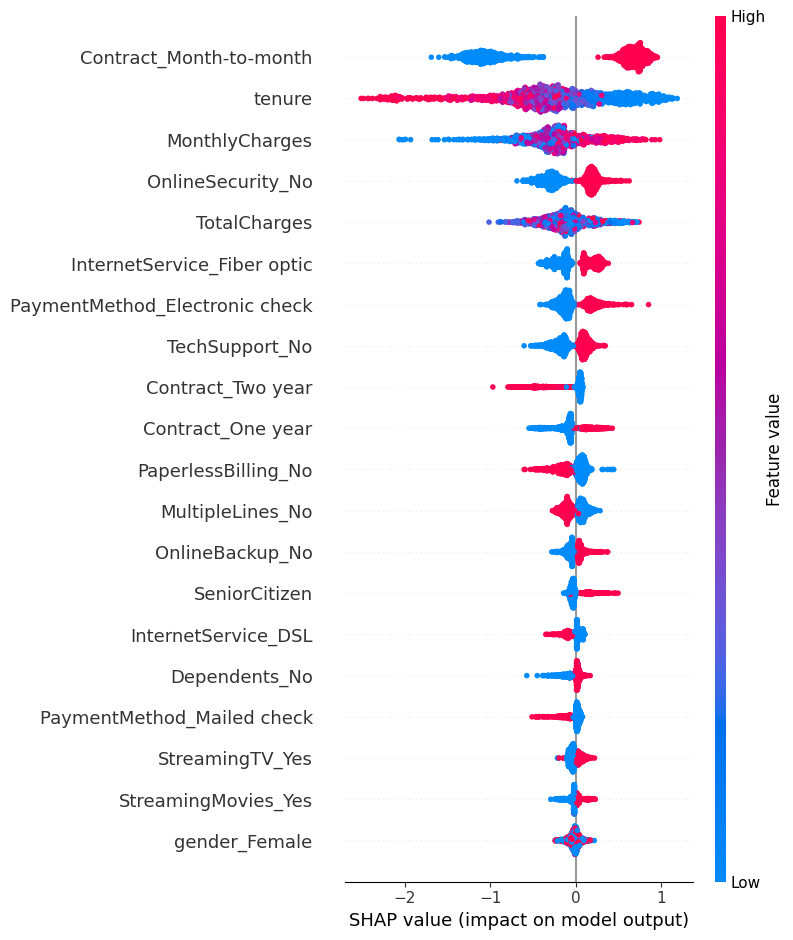

In [ ]:
import shap

# Giriş verisini NumPy array olarak kullan
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Özellik isimleri korunur
shap.summary_plot(shap_values, X_test)

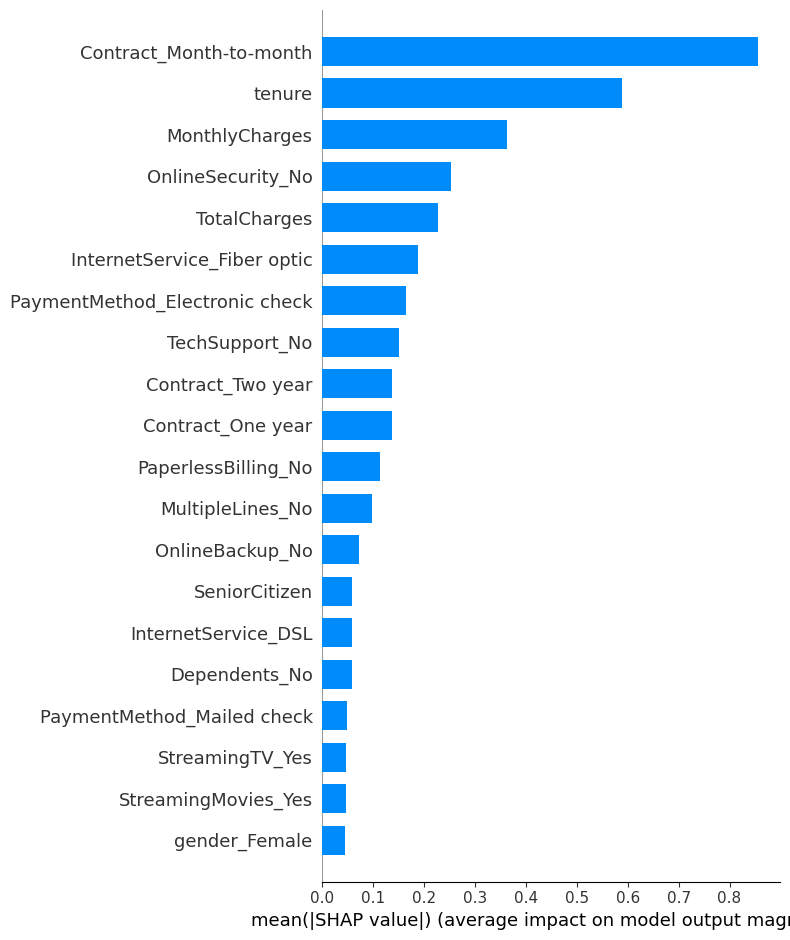

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
selected_features = ['gender_Female', 'gender_Male', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month']


In [ ]:
# Gerekli kütüphaneler
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Veri setini oku
# Updated file path: Assuming the file is in the same directory as the notebook
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# If the file is in a different location, replace 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
# with the correct path, e.g., '/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# TotalCharges sayısal hale getir
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Kategorik değişkenleri sayısal hale getir (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

# Hedef değişken
y = df['Churn_Yes']

# Özellikler
X = df.drop(['Churn_Yes'], axis=1)

# Eğitim-test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeller
models = {
    "Lojistik Regresyon": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Karar Ağacı": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}

# Eğit ve değerlendir
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, acc, f1))
    print(f"🔹 {name}\n   Accuracy: {acc:.3f} | F1 Score: {f1:.3f}\n{'-'*40}")

🔹 Lojistik Regresyon
   Accuracy: 0.780 | F1 Score: 0.422
----------------------------------------
🔹 KNN
   Accuracy: 0.762 | F1 Score: 0.466
----------------------------------------
🔹 Karar Ağacı
   Accuracy: 0.751 | F1 Score: 0.503
----------------------------------------
🔹 Random Forest
   Accuracy: 0.790 | F1 Score: 0.542
----------------------------------------
🔹 SVM
   Accuracy: 0.755 | F1 Score: 0.225
----------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Hiperparametre aralığını tanımla (min_samples_split için 1 yerine 2 ve üzeri değerler kullanıldı)
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 3, 7],
    'min_samples_split': [2, 4, 9],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch nesnesini oluştur
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',        # F1 skoru üzerinden değerlendirme
    cv=5,
    n_jobs=-1,
    verbose=2,
    error_score='raise'  # Hata varsa direkt göster
)

# Eğitimi gerçekleştir
grid_search.fit(X_train, y_train)

# En iyi modeli al
best_rf = grid_search.best_estimator_

# En iyi parametreleri ve skorları yazdır
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi F1 skoru:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
En iyi F1 skoru: 0.5466822315607354


🎯 En İyi Random Forest Modeli (GridSearch sonrası)
Accuracy: 0.784
F1 Score: 0.526

Sınıflandırma Raporu:
               precision    recall  f1-score   support

       False       0.82      0.90      0.86      1033
        True       0.63      0.45      0.53       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



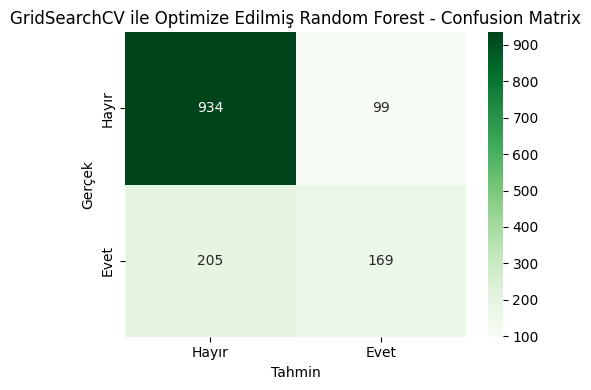

In [ ]:
# Tahmin yap
y_pred_best_rf = best_rf.predict(X_test)

# Performans çıktısı
print("🎯 En İyi Random Forest Modeli (GridSearch sonrası)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_rf):.3f}")
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens", xticklabels=["Hayır", "Evet"], yticklabels=["Hayır", "Evet"])
plt.title("GridSearchCV ile Optimize Edilmiş Random Forest - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Eğitim-test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# ✔️ Şimdi rastgele 5 müşteri seçelim
random_5 = X.sample(5, random_state=42)
random_5_scaled = scaler.transform(random_5)

# Tahmin olasılıklarını al
probabilities = model.predict_proba(random_5_scaled)

# Sonuçları görselleştirelim
results = random_5.copy()
results["Kayıp Olasılığı (%)"] = (probabilities[:, 1] * 100).round(2) # "Hayatta Kalma" yerine "Kayıp"
results["Tahmin"] = np.where(probabilities[:, 1] >= 0.5, "Kayıp", "Kalacak") # Tahmin etiketlerini güncelle

print("🔍 Rastgele 5 Müşteri Tahmini:\n")
# Telco veri setine uygun sütunlar:
print(results[['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'OnlineSecurity_Yes', "Kayıp Olasılığı (%)", "Tahmin"]])

🔍 Rastgele 5 Müşteri Tahmini:

      tenure  MonthlyCharges  TotalCharges  gender_Male  Partner_Yes  \
2481      61           25.00       1501.75         True         True   
6784      19           24.70        465.85        False        False   
6125      13          102.25       1359.00         True         True   
3052      37           55.05       2030.75         True         True   
4099       6           29.45        161.45        False        False   

      Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  OnlineSecurity_Yes  \
2481           False              True               True               False   
6784           False              True               True               False   
6125           False              True               True               False   
3052           False              True               True                True   
4099           False             False              False                True   

      Kayıp Olasılığı (%)   Tahmin  
2481        

In [ ]:
# Yeni müşteri verisi
new_customer = pd.DataFrame([{
    'gender_Male': 0,
    'SeniorCitizen': 0,
    'Partner_Yes': 1,
    'Dependents_Yes': 0,
    'tenure': 12,
    'PhoneService_Yes': 1,
    'MultipleLines_Yes': 0,
    'OnlineSecurity_Yes': 1,
    'OnlineBackup_Yes': 0,
    'DeviceProtection_Yes': 1,
    'TechSupport_Yes': 0,
    'StreamingTV_Yes': 1,
    'StreamingMovies_Yes': 0,
    'Contract_One year': 0,
    'Contract_Two year': 0,
    'PaperlessBilling_Yes': 1,
    'PaymentMethod_Credit card (automatic)': 0,
    'PaymentMethod_Electronic check': 1,
    'PaymentMethod_Mailed check': 0,
    'MonthlyCharges': 65.0,
    'TotalCharges': 780.0
}])

# Eksik sütunları ekle
missing_cols = [col for col in X.columns if col not in new_customer.columns]
missing_df = pd.DataFrame(0, index=new_customer.index, columns=missing_cols)
new_customer = pd.concat([new_customer, missing_df], axis=1)

# Sütun sırasını düzelt
new_customer = new_customer[X.columns]

# Ölçekleme uygula
new_customer_scaled = scaler.transform(new_customer)

# Tahmin yap
prob = model.predict_proba(new_customer_scaled)[0][1]
tahmin = "Kayıp" if prob >= 0.5 else "Kalacak"

# Sonucu yazdır
print("🧍 Yeni Müşteri Profili Tahmini:")
print(f"Kayıp Olasılığı: %{prob * 100:.2f} → Tahmin: {tahmin}")


🧍 Yeni Müşteri Profili Tahmini:
Kayıp Olasılığı: %34.00 → Tahmin: Kalacak


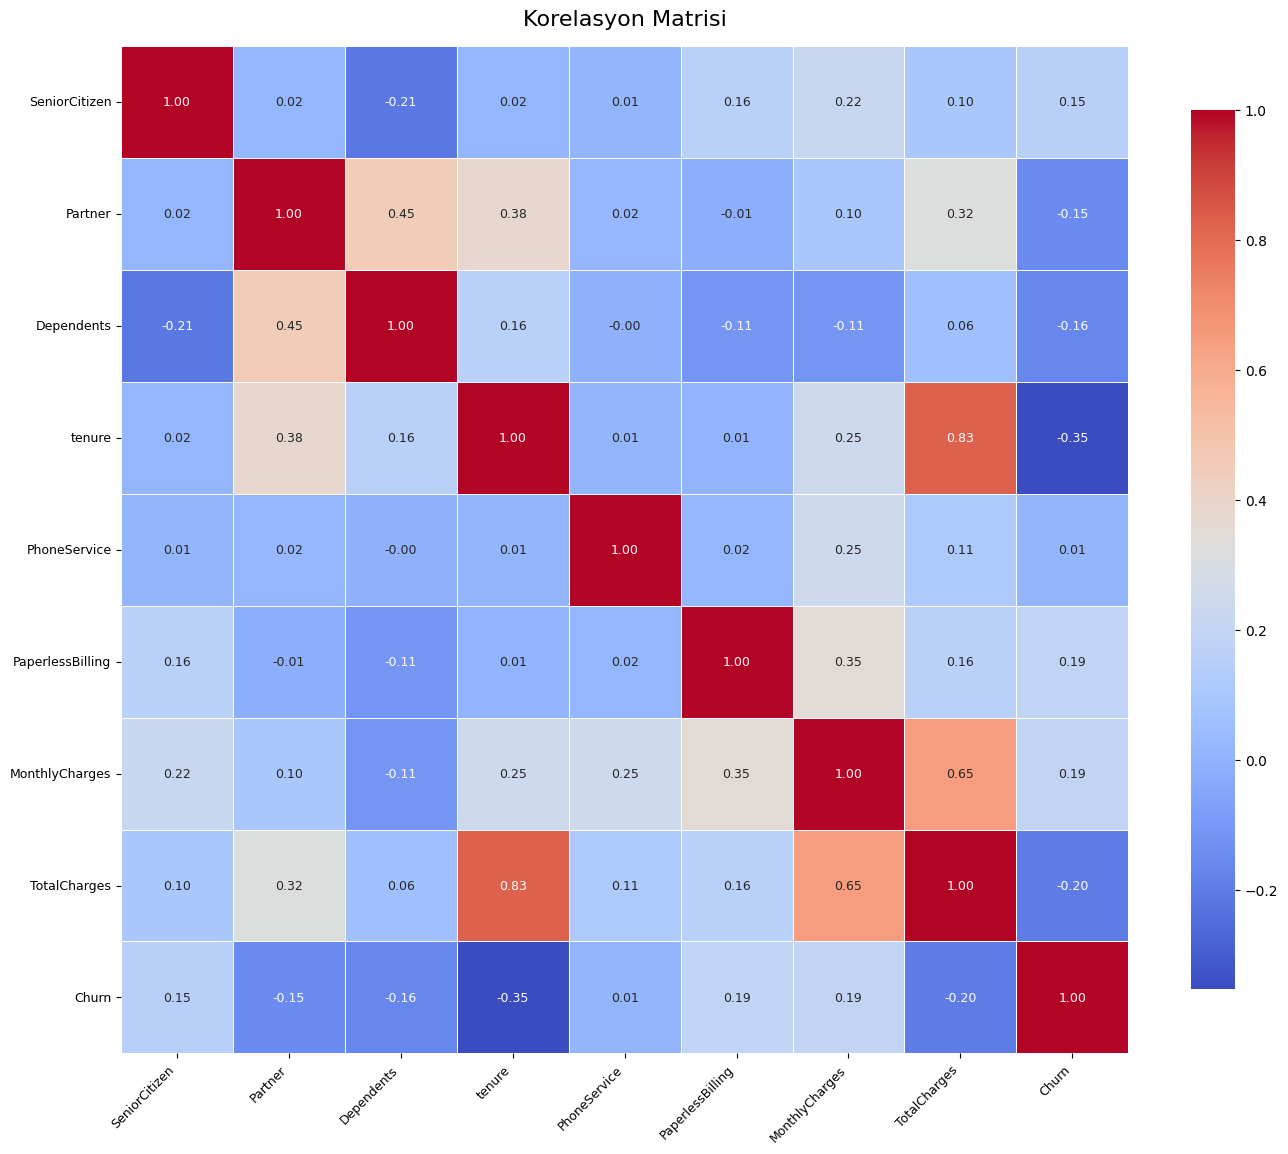

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini oku
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# TotalCharges sütununu sayısala dönüştür
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Kategorik olup sayısal olarak anlamlı olanları dönüştür
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Sayısal sütunları seç
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisi oluştur
corr = numerical_df.corr()

# Korelasyon grafiği çiz
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    annot_kws={"size": 9}
)
plt.title("Korelasyon Matrisi", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

In [ ]:
!pip install gradio
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Örnek veri
data = pd.DataFrame(np.random.rand(100, 22), columns=[
    'gender_Male', 'SeniorCitizen', 'Partner_Yes', 'Dependents_Yes', 'tenure',
    'PhoneService_Yes', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
    'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
    'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One_year',
    'Contract_Two_year', 'PaperlessBilling_Yes',
    'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
    'PaymentMethod_Mailed_check', 'MonthlyCharges', 'TotalCharges', 'Churn'
])
data['Churn'] = np.random.randint(0, 2, size=100)

X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

def predict_churn(
    gender_Male, SeniorCitizen, Partner_Yes, Dependents_Yes, tenure,
    PhoneService_Yes, MultipleLines_Yes, OnlineSecurity_Yes,
    OnlineBackup_Yes, DeviceProtection_Yes, TechSupport_Yes,
    StreamingTV_Yes, StreamingMovies_Yes, Contract_One_year,
    Contract_Two_year, PaperlessBilling_Yes,
    PaymentMethod_Credit_card_automatic, PaymentMethod_Electronic_check,
    PaymentMethod_Mailed_check, MonthlyCharges, TotalCharges
):
    input_data = pd.DataFrame([{
        'gender_Male': gender_Male,
        'SeniorCitizen': SeniorCitizen,
        'Partner_Yes': Partner_Yes,
        'Dependents_Yes': Dependents_Yes,
        'tenure': tenure,
        'PhoneService_Yes': PhoneService_Yes,
        'MultipleLines_Yes': MultipleLines_Yes,
        'OnlineSecurity_Yes': OnlineSecurity_Yes,
        'OnlineBackup_Yes': OnlineBackup_Yes,
        'DeviceProtection_Yes': DeviceProtection_Yes,
        'TechSupport_Yes': TechSupport_Yes,
        'StreamingTV_Yes': StreamingTV_Yes,
        'StreamingMovies_Yes': StreamingMovies_Yes,
        'Contract_One_year': Contract_One_year,
        'Contract_Two_year': Contract_Two_year,
        'PaperlessBilling_Yes': PaperlessBilling_Yes,
        'PaymentMethod_Credit_card_automatic': PaymentMethod_Credit_card_automatic,
        'PaymentMethod_Electronic_check': PaymentMethod_Electronic_check,
        'PaymentMethod_Mailed_check': PaymentMethod_Mailed_check,
        'MonthlyCharges': MonthlyCharges,
        'TotalCharges': TotalCharges
    }])

    for col in X.columns:
        if col not in input_data.columns:
            input_data[col] = 0

    input_data = input_data[X.columns]
    input_data_scaled = scaler.transform(input_data)
    prob = model.predict_proba(input_data_scaled)[0][1]
    prob_percent = round(prob * 100, 2)

    if prob > 0.5:
        tahmin = "Müşteri Kaybedilecek"
        renk = "#ff6b6b"
        oneri = """
        <ul style='color: #ffffff;'>
            <li>📞 Müşteriye özel arama ile memnuniyetsizlik araştırılsın</li>
            <li>🎁 Sadakat programı veya avantajlı teklif sunulsun</li>
            <li>🛠️ Teknik destek önerilsin</li>
        </ul>
        """
    else:
        tahmin = "Müşteri Kalacak"
        renk = "#51cf66"
        oneri = """
        <ul style='color: #ffffff;'>
            <li>🌟 Mevcut hizmet kalitesi korunmalı</li>
            <li>📈 Upsell ve çapraz satış stratejileri değerlendirilsin</li>
            <li>🔄 Geri bildirim alınarak memnuniyet artırılsın</li>
        </ul>
        """

    return f"""
    <div style='border: 2px solid {renk}; padding: 20px; border-radius: 10px; background-color: #1e1e1e;'>
        <h2 style='color: {renk}; text-align: center;'>Tahmin Sonucu</h2>
        <p style='font-size: 18px; color: #ffffff;'><b>Olasılık:</b> <span style='color: {renk}; font-weight: bold;'>{prob_percent}%</span></p>
        <p style='font-size: 18px; color: #ffffff;'><b>Sonuç:</b> {tahmin}</p>
        <h3 style='color: #ffffff;'>Öneriler:</h3>
        {oneri}
        <p style='font-size: 14px; color: #adb5bd; text-align: center;'>Model: Random Forest | Doğruluk: {model.score(X_test_scaled, y_test):.2f}</p>
    </div>
    """

with gr.Blocks(theme=gr.themes.Soft(), title="Telco Müşteri Kaybı Tahmini") as demo:
    gr.Markdown("# 📞 Telco Müşteri Kaybı Tahmini Aracı")
    gr.Markdown("Müşteri bilgilerini girin ve kayıp olasılığını öğrenin.")

    with gr.Tabs():
        with gr.TabItem("📋 Temel Bilgiler"):
            gender = gr.Radio(["Kadın", "Erkek"], label="Cinsiyet", value="Kadın")
            senior = gr.Radio(["Hayır", "Evet"], label="Yaşlı Vatandaş", value="Hayır")
            partner = gr.Radio(["Hayır", "Evet"], label="Partner", value="Hayır")
            dependents = gr.Radio(["Hayır", "Evet"], label="Bakmakla Yükümlü", value="Hayır")
            tenure = gr.Slider(0, 100, step=1, label="Abonelik Süresi (ay)", value=1)

        with gr.TabItem("📞 Hizmet Bilgileri"):
            phone = gr.Radio(["Yok", "Var"], label="Telefon Hizmeti", value="Yok")
            multiple = gr.Radio(["Yok", "Var"], label="Çoklu Hat", value="Yok")
            security = gr.Radio(["Yok", "Var"], label="Online Güvenlik", value="Yok")
            backup = gr.Radio(["Yok", "Var"], label="Online Yedekleme", value="Yok")
            protection = gr.Radio(["Yok", "Var"], label="Cihaz Koruması", value="Yok")
            support = gr.Radio(["Yok", "Var"], label="Teknik Destek", value="Yok")
            tv = gr.Radio(["Yok", "Var"], label="Streaming TV", value="Yok")
            movies = gr.Radio(["Yok", "Var"], label="Streaming Filmler", value="Yok")

        with gr.TabItem("💰 Fatura ve Sözleşme"):
            contract = gr.Radio(["Aylık", "1 Yıl", "2 Yıl"], label="Sözleşme Süresi", value="Aylık")
            paperless = gr.Radio(["Hayır", "Evet"], label="Kağıtsız Fatura", value="Hayır")
            payment = gr.Radio([
                "Kredi Kartı (Otomatik)",
                "Elektronik Çek",
                "Posta Çeki",
                "Banka Havalesi (Otomatik)"
            ], label="Ödeme Yöntemi", value="Kredi Kartı (Otomatik)")
            monthly = gr.Number(label="Aylık Ücret ($)", value=0)
            total = gr.Number(label="Toplam Ücret ($)", value=0)

    def to_binary(val, positive="Var"):
        return 1 if val in ["Evet", "Erkek", positive] else 0

    def prepare_inputs(
        gender, senior, partner, dependents, tenure,
        phone, multiple, security, backup,
        protection, support, tv, movies,
        contract, paperless, payment, monthly, total
    ):
        contract_one = 1 if contract == "1 Yıl" else 0
        contract_two = 1 if contract == "2 Yıl" else 0
        payment_credit = 1 if payment == "Kredi Kartı (Otomatik)" else 0
        payment_electronic = 1 if payment == "Elektronik Çek" else 0
        payment_mailed = 1 if payment == "Posta Çeki" else 0

        return [
            to_binary(gender, "Erkek"),
            to_binary(senior),
            to_binary(partner),
            to_binary(dependents),
            tenure,
            to_binary(phone),
            to_binary(multiple),
            to_binary(security),
            to_binary(backup),
            to_binary(protection),
            to_binary(support),
            to_binary(tv),
            to_binary(movies),
            contract_one,
            contract_two,
            to_binary(paperless),
            payment_credit,
            payment_electronic,
            payment_mailed,
            monthly,
            total
        ]

    submit = gr.Button("Tahmin Yap", variant="primary")
    output = gr.HTML()

    submit.click(
        fn=lambda *x: predict_churn(*prepare_inputs(*x)),
        inputs=[gender, senior, partner, dependents, tenure,
                phone, multiple, security, backup,
                protection, support, tv, movies,
                contract, paperless, payment, monthly, total],
        outputs=output
    )

demo.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6f7f58890498f8b7b0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory